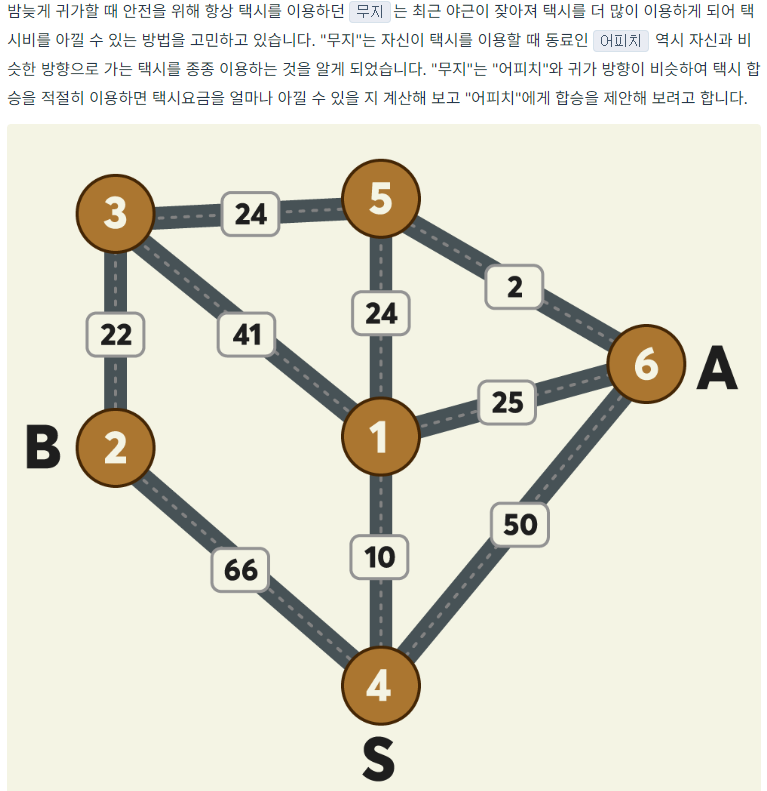

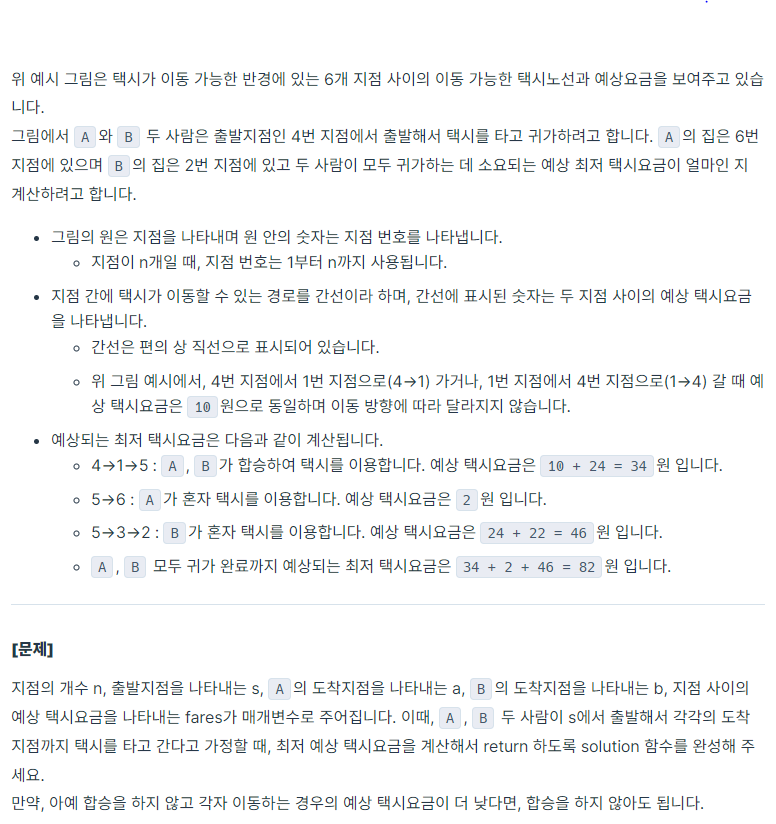

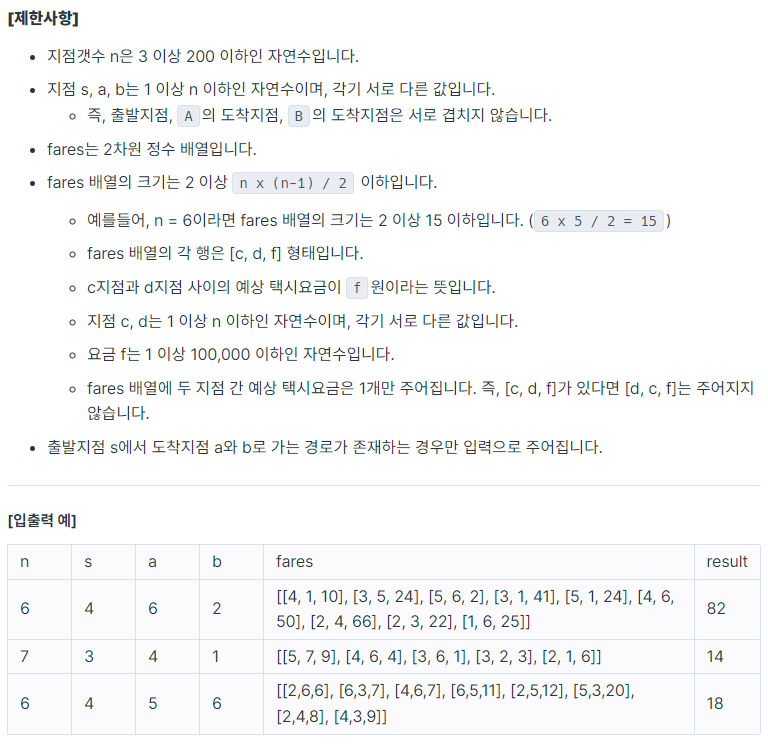

https://school.programmers.co.kr/learn/courses/30/lessons/72413

In [1]:
from heapq import heappop, heappush

INF = int(1e9)
graph = [[]]

def preprocess(n, fares):
    global graph
    graph = [[] for i in range(n+1)]

    for fare in fares:
        src, dst, cost = fare[0], fare[1], fare[2]
        graph[src].append([dst, cost])
        graph[dst].append([src, cost])

def dijkstra(src, dst):
    global graph
    n = len(graph)
    # 거리 저장 배열
    dist = [INF for i in range(n)]
    # 첫 정점의 거리는 0
    dist[src] = 0
    # 우선순위 큐에 (거리 0, 첫 정점)만 먼저 넣는다.
    pq = [[0,src]]

    while pq:
        w, x = heappop(pq)

        # 거리배열에 저장된 값이 더 큰 경우에만 업데이트
        if dist[x] < w:
            continue

        for item in graph[x]: 
            nx, ncost = item[0], item[1]
            ncost += w
            # 현재 노드까지 거리 + 해당 노드로부터 연결된 다른 노드로 거리가 더 작을 때 업데이트
            if ncost < dist[nx]:
                dist[nx] = ncost
                # 우선순위큐에 넣어줌
                heappush(pq, [ncost, nx])
    return dist[dst]

def solution(n, s, a, b, fares):
    preprocess(n, fares)
    # a, b 각각의 최단 거리 비용을 먼저 구하고 더한다
    cost = dijkstra(s, a) + dijkstra(s, b)
    for i in range(1, n+1):
        # 특정 지점까지 합승했을 때 비용과 비교한다.
        if s!= i:
            cost = min(cost, dijkstra(s, i) + dijkstra(i, a) + dijkstra(i,b))
    return cost

In [2]:
n = 6
s = 4
a = 6
b = 2
fares = [[4, 1, 10], [3, 5, 24], [5, 6, 2], [3, 1, 41], [5, 1, 24], [4, 6, 50], [2, 4, 66], [2, 3, 22], [1, 6, 25]]
solution(n, s, a, b, fares)

82